In [1470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import  textblob
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn import naive_bayes
from sklearn import svm


import re    #for regex

from textblob import TextBlob
from sklearn.model_selection import train_test_split, GridSearchCV

import nltk
nltk.download('stopwords')
nltk.download('wordnet')


# Set the NLTK data path to the local directory




data = pd.read_csv('Womens Clothing Reviews Data.csv')


[nltk_data] Downloading package stopwords to C:\Users\CADT-
[nltk_data]     Sonai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\CADT-
[nltk_data]     Sonai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1. Performing Exploratory Analysis on the Data to Understand the Patterns:
 Exploratory analysis involves examining the dataset to get an initial understanding of its structure, variables, and potential patterns. This step is crucial for identifying trends, outliers, and relationships within the data. The goal is to gain insights into customer behaviors and preferences based on their demographics and reviews. Exploratory analysis may include data visualizations such as bar plots, histograms, scatter plots, and summary statistics.

##### a. Characteristic of data

In [1471]:
# the 'head()' method is used to retrieve the top rows of the Dataframe. By defult, it returnd the five rows.
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [1472]:
#this line show about dataset, including datatypes, non-null counts, and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [1473]:
#summary statistics for numerical columns 
data.describe()

,Product ID,Customer Age,Rating,Recommend Flag
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362
std,203.298980,12.279544,1.110031,0.382216
min,0.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


In [1474]:
#check null data
data.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

#### b. Data Cleaning 

In [1475]:
#drop null data
data.dropna(inplace=True)

In [1476]:
#check again if there's any other null data
data.isnull().sum()

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Title      0
Review Text       0
Rating            0
Recommend Flag    0
dtype: int64

In [1477]:
#find data duplicate and drop duplicate data
data.drop_duplicates() 

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [1478]:
# Move cleaned data to other file
data.to_csv('cleaned data.csv', index=False)

In [1479]:
## Data Virtualization

In [1480]:
# read the cleaned data 
data = pd.read_csv('cleaned data.csv')


#### c. Exploratory Data Analysis (EDA)


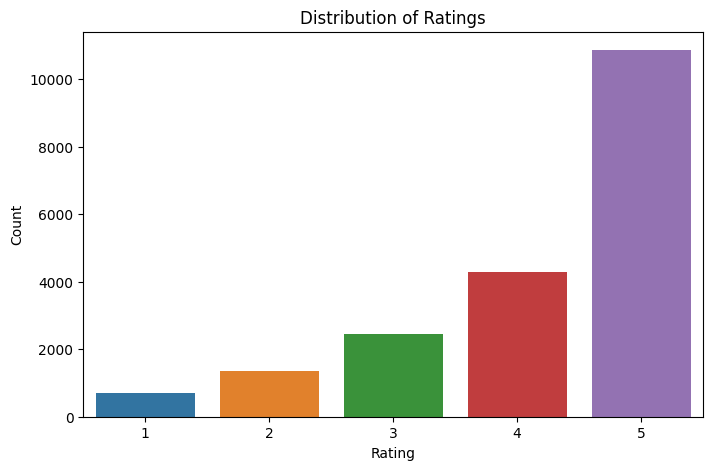

In [1481]:
# Plotting the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

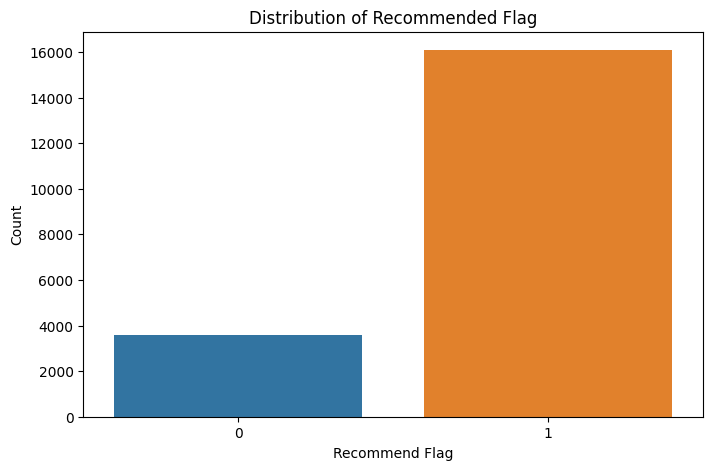

In [1482]:
# Plotting the distribution of recommended and non-recommended products
plt.figure(figsize=(8, 5))
sns.countplot(x='Recommend Flag', data=data)
plt.title('Distribution of Recommended Flag')
plt.xlabel('Recommend Flag')
plt.ylabel('Count')
plt.show()

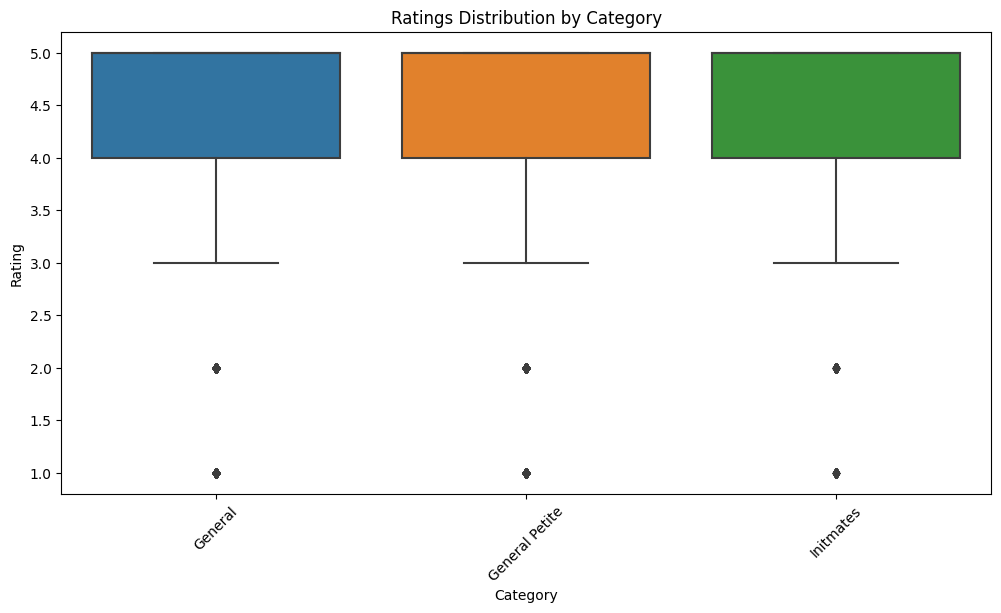

In [1483]:
# Visualizing the distribution of ratings by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=data)
plt.title('Ratings Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

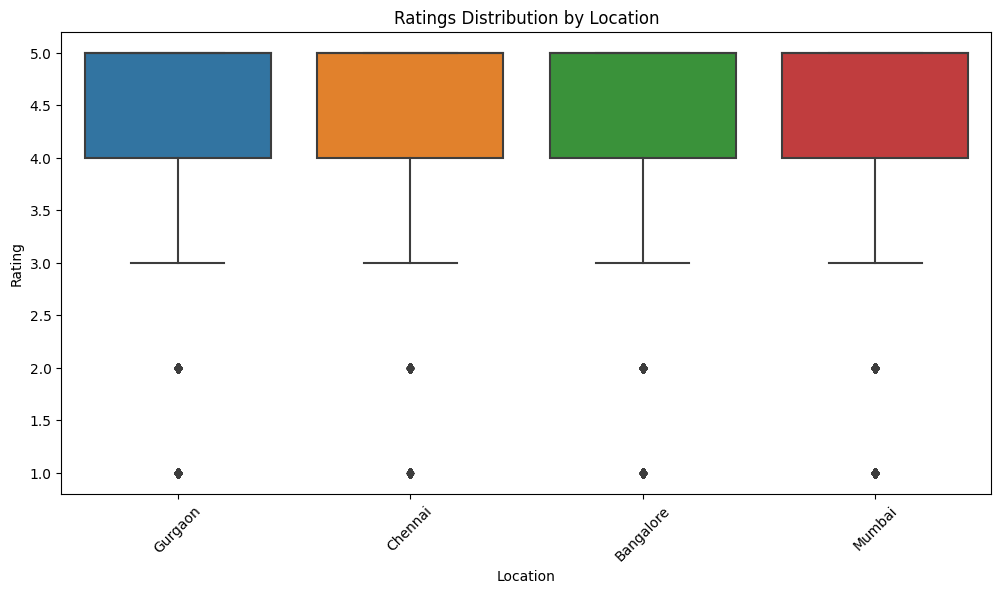

In [1484]:
# Visualizing the distribution of ratings by location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Rating', data=data)
plt.title('Ratings Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

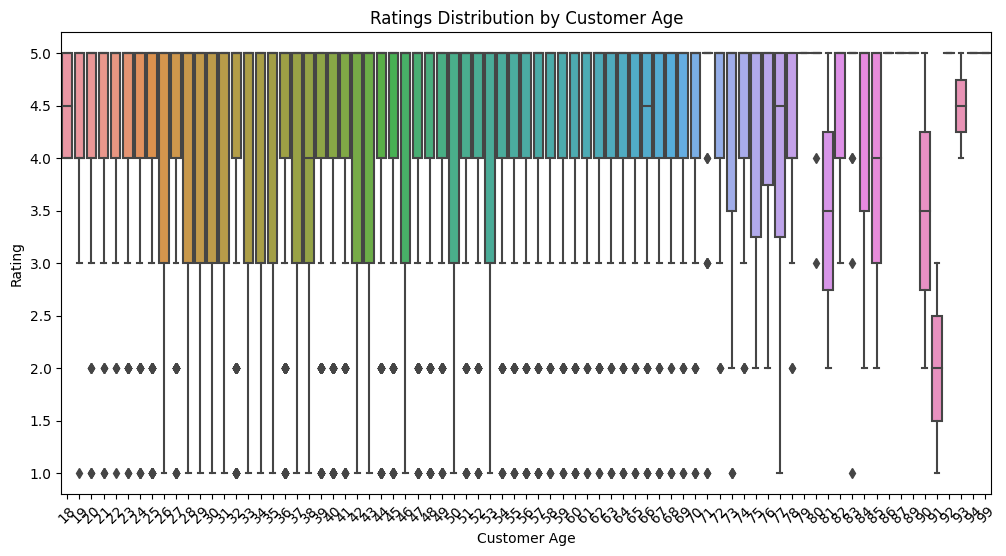

In [1485]:
# Visualizing the distribution of ratings by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer Age', y='Rating', data=data)
plt.title('Ratings Distribution by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()



### 2. Perform Text Mining Tasks to Understand the Most Frequent Words for Positive and Negative Sentiment. Create Word Clouds for the Positive & Negative Reviews Separately:

Text mining involves analyzing and extracting information from text data. In this case, the objective is to analyze customer reviews submitted on the website. The first step is to process and clean the text data by removing stopwords, special characters, and converting the text to lowercase. Next, sentiment analysis can be performed to classify reviews as positive or negative. Word frequency analysis will help identify the most common words used in positive and negative reviews. Word clouds are visual representations of word frequencies, and separate word clouds can be created for positive and negative sentiments.

In [1486]:
# column called 'sentiment' containing the sentiment polarity score for each review text in the 'Review_Text' column. 
# This sentiment score reflects the overall sentiment of the text, whether it is positive, negative, or neutral.

data['Review Text'] = data['Review Text'].astype(str)
data['sentiment'] = data["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity ) 
data.head()




,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,sentiment
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000
2,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750


In [1487]:
# Divide the data in to positive, negative and neutral sentiments and add a column sentiment_category
data['sentiment_cat'] = np.where(data.sentiment>0.1,'Positive', np.where(data.sentiment<0.1, 'Negative', 'Nuetral'))
#df['sentiment_cat'] = np.where(df.sentiment>0.1,'Positive', np.where(data.sentiment<-0.1,'Negative', 'Nuetral'))
data.head()


,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,sentiment,sentiment_cat
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive
2,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,Positive
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive


In [1488]:
# total positive, negative and neutral sentiments in sentiment_cat using .value_counts()
data.sentiment_cat.value_counts()

#df.sentiment_cat.value_counts()

sentiment_cat
Positive    16199
Negative     3443
Nuetral        20
Name: count, dtype: int64

<Axes: xlabel='sentiment_cat'>

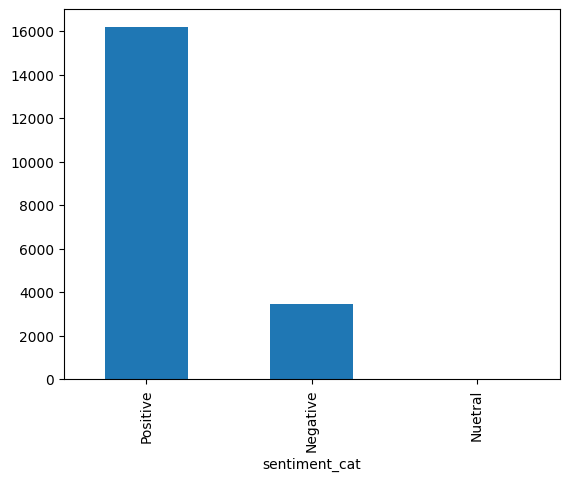

In [1489]:
data.sentiment_cat.value_counts().plot(kind='bar')


In [1490]:
plt.savefig('Sentiment_plot')


<Figure size 640x480 with 0 Axes>

In [1491]:
data.Rating.value_counts()  #rating count 


Rating
5    10858
4     4289
3     2464
2     1360
1      691
Name: count, dtype: int64

In [1492]:
pd.crosstab(data.sentiment_cat, data.Rating)
#pd.crosstab(df.sentiment_cat, df.Rating)

Rating,1,2,3,4,5
sentiment_cat,,,,,
Negative,361,607,772,772,931
Nuetral,2,4,6,4,4
Positive,328,749,1686,3513,9923


##### Divide the data into three groups on the basis of sentiments like positive, negative and neutral

In [1493]:
data_neg = data[(data.sentiment_cat=='Negative')]
data_pos = data[(data.sentiment_cat=='Positive')]
data_neu = data[(data.sentiment_cat=='Neutral')]


In [1494]:
## X-variable is Review_text and y-variable is Rating
# define X and y
X = data['Review Text']
y = data['Rating']

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14746,)
(4916,)
(14746,)
(4916,)


In [1495]:
data.shape


(19662, 13)

##### Split the data into train & Test for positive sentiments and negative sentiments

In [1496]:
# create a new DataFrame that only contains the 5 Rating and 1-Rating reviews
#women_clothing = women_clothing[(women_clothing.Rating==5) | (women_clothing.Rating==1)]

# define X and y
X2 = data_pos['Review Text']
y2 = data_pos['Rating']

# split the new DataFrame into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(12149,)
(4050,)
(12149,)
(4050,)


In [1497]:
# define X and y
X1 = data_neg['Review Text']
y1 = data_neg['Rating']

# split the new DataFrame into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(2582,)
(861,)
(2582,)
(861,)


In [1498]:
data_pos.shape


(16199, 13)

In [1499]:
data_neg.shape


(3443, 13)

##### Creating user defined functions for clean the text and pre-process the data

In [1500]:
#Abbrevations and Words correction
def clean_text(Review_Text):
    Review_Text = Review_Text.lower()
    Review_Text = Review_Text.strip()
    Review_Text = re.sub(r' +', ' ', Review_Text)
    Review_Text = re.sub(r"[-()\"#/@;:{}`+=~|.!?*&£%€¦_><‘|,'0-9]", "", Review_Text)
    Review_Text = Review_Text.replace('wat', 'what').replace('txts', 'texts').replace('vry', 'very').replace('gud', 'good').replace('nyt', 'night').replace('msg', 'message')
    return(Review_Text)

In [1501]:
sw = list(set(nltk.corpus.stopwords.words('english')))


In [1502]:
stop = list(set(sw + ['the', 'me', 'how', 'what']))
print(stop)

['only', 'm', 'isn', "you've", 'other', "you'd", 'his', 'a', "shan't", 'her', 'by', 'itself', 'they', 'while', 'with', "she's", 'don', 'shan', 'once', 'or', "hadn't", 'more', 'own', 'into', 'aren', 'how', "that'll", 'are', 'them', 'were', 'of', 'so', 'himself', "wouldn't", 'it', 'nor', 'against', 'does', 'those', 'mustn', 'again', 'before', "wasn't", 'these', 'be', 'few', 'he', 'in', 'did', 'doing', 'doesn', 'about', "you'll", 'from', 'out', 'who', "doesn't", 'there', 'she', "should've", 'hers', 've', 'been', 'shouldn', 'between', 'mightn', 'do', 'my', 'him', "won't", 'being', 'you', 'any', 'which', 'was', 'am', 'weren', 'too', "couldn't", 'than', 'why', 'no', "haven't", 'same', 'that', 'herself', 'll', 'until', 'ma', 'yourselves', 'themselves', 'because', 'yourself', 'their', 'if', 'hadn', "it's", "mightn't", 'myself', 'your', 'now', 'our', 'at', 'above', "aren't", 'wouldn', 'can', 'whom', 'ourselves', 'its', 'as', 'had', 'wasn', "don't", 'couldn', 'won', 'over', 'for', 'is', 'each', 

In [1503]:
def pre_process(Review_Text):
    Review_Text = Review_Text.str.replace('/','')                           #Replacing the / with none
    Review_Text = Review_Text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    Review_Text = Review_Text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    return(Review_Text)

In [1504]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [1505]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

##### CLean the text and pre-process the data for positive sentiments

In [1506]:
X2_train = X2_train.apply(lambda x: clean_text(x))
X2_test = X2_test.apply(lambda x: clean_text(x))

In [1507]:
X2_train=pre_process(X2_train)
X2_test=pre_process(X2_test)

In [1508]:
X2_train


4365     really wanted love everything piece especially...
10073    great dress cut nicely flattering short put lo...
6742     love dress easy breezy flowy comfortable pink ...
7444     top fit loose cute relaxed dress shorter front...
19067    love love love legging soft colorful comfortab...
                               ...                        
19581    love dress much absolutely beautiful true size...
6332     top nice ordered black looked good embroidery ...
14791    seafolly favorite brand swimwear ive collected...
283      im pretty solid brand went since thought top r...
16216    purchased something daughter complimentary cut...
Name: Review Text, Length: 12149, dtype: object

##### CLean the text and pre-process the data for negative sentiments

In [1509]:
X1_train = X1_train.apply(lambda x: clean_text(x))
X1_test = X1_test.apply(lambda x: clean_text(x))

In [1510]:
X1_train=pre_process(X1_train)
X1_test=pre_process(X1_test)

##### Vectorization (Count, Tfidf) for positive sentiments

In [1511]:
#Train
count_vect2 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain2_count = count_vect2.fit_transform(X2_train)

In [1512]:
xtrain2_count


<12149x800 sparse matrix of type '<class 'numpy.int64'>'
	with 271205 stored elements in Compressed Sparse Row format>

##### Vectorization (Count, Tfidf) for negative sentiments

In [1513]:
count_vect1 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain1_count = count_vect1.fit_transform(X1_train)

##### View the document term metrics for positive sentiments

In [1514]:
dtm=xtrain2_count.toarray()



In [1515]:
print(count_vect2.get_feature_names_out())


['able' 'absolutely' 'across' 'actually' 'add' 'added' 'addition'
 'adorable' 'adore' 'ag' 'ago' 'agree' 'airy' 'aline' 'almost' 'along'
 'already' 'also' 'although' 'always' 'amazing' 'amount' 'anighthing'
 'ankle' 'another' 'anyone' 'anyway' 'appears' 'appropriate' 'area'
 'arent' 'arm' 'armhole' 'around' 'arrived' 'athletic' 'attractive'
 'available' 'average' 'away' 'awesome' 'b' 'baby' 'back' 'bad' 'bag'
 'baggy' 'band' 'barely' 'based' 'basic' 'bc' 'beach' 'beading'
 'beautiful' 'beautifully' 'beige' 'believe' 'belly' 'belt' 'best'
 'better' 'big' 'bigger' 'billowy' 'bit' 'black' 'blazer' 'blouse' 'blue'
 'bodice' 'body' 'boot' 'booty' 'bottom' 'bought' 'boxy' 'boyfriend' 'bra'
 'brand' 'bright' 'broad' 'brown' 'build' 'bulky' 'bust' 'busty' 'butt'
 'button' 'buy' 'buying' 'c' 'came' 'cami' 'camisole' 'cannot' 'cant'
 'cardigan' 'care' 'case' 'casual' 'caught' 'chance' 'cheap' 'chest'
 'chested' 'chic' 'classic' 'classy' 'clingy' 'close' 'closet' 'clothes'
 'clothing' 'coat' 'col

In [1516]:
dtm1=pd.DataFrame(dtm, columns = count_vect2.get_feature_names_out())


In [1517]:
dtm1


,able,absolutely,across,actually,add,added,addition,adorable,adore,ag,...,xl,xx,year,yellow,yes,yesterday,yet,youre,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12144,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12146,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12147,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1518]:
dtm1.apply(sum)


able          261
absolutely    506
across        158
actually      382
add           342
             ... 
yesterday      70
yet           335
youre         203
zip            82
zipper        182
Length: 800, dtype: int64

##### View the document term metrics for negative sentiments

In [1519]:
dtm4=xtrain1_count.toarray()


In [1520]:
print(count_vect1.get_feature_names_out())


['able' 'absolutely' 'across' 'actually' 'add' 'added' 'addition'
 'adorable' 'afraid' 'ago' 'agree' 'ala' 'almost' 'along' 'already' 'also'
 'although' 'always' 'amount' 'anighthing' 'ankle' 'another' 'anyone'
 'anyway' 'apart' 'appears' 'area' 'arent' 'arm' 'armhole' 'armpit'
 'around' 'arrived' 'athletic' 'attached' 'available' 'average' 'away'
 'awful' 'awkward' 'b' 'baby' 'back' 'bad' 'badly' 'bag' 'baggy' 'band'
 'barely' 'based' 'basic' 'bc' 'beautiful' 'behind' 'belly' 'belt'
 'better' 'beware' 'big' 'bigger' 'billowy' 'bit' 'black' 'blouse' 'blue'
 'bodice' 'body' 'boob' 'boot' 'booty' 'boring' 'bother' 'bottom' 'bought'
 'bow' 'boxy' 'bra' 'brand' 'breast' 'bright' 'broad' 'brown' 'build'
 'bulky' 'bunch' 'bust' 'busted' 'busty' 'butt' 'button' 'buy' 'buying'
 'c' 'came' 'cami' 'cannot' 'cant' 'cardigan' 'care' 'case' 'casual'
 'caught' 'center' 'chance' 'cheap' 'chest' 'chic' 'chose' 'classic'
 'clean' 'cling' 'clingy' 'close' 'clothes' 'clothing' 'coat' 'cold'
 'collar' 'co

In [1521]:
dtm5=pd.DataFrame(dtm4, columns = count_vect1.get_feature_names_out())


In [1522]:
dtm5


,able,absolutely,across,actually,add,added,addition,adorable,afraid,ago,...,xsmall,xx,yarn,year,yellow,yes,yet,youre,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2579,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1523]:
dtm5.apply(sum)


able          31
absolutely    53
across        57
actually      96
add           47
              ..
yes           17
yet           43
youre         48
zip           36
zipper        69
Length: 800, dtype: int64

##### Word frequencies for positive sentiments

In [1524]:
word_freq = pd.DataFrame(dtm1.apply(sum).head(40), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

In [1525]:
word_freq


,freq
also,1341
arm,721
around,586
absolutely,506
area,405
actually,382
another,372
almost,369
add,342
always,341


In [1526]:
word_freq_dictionary = dict(dtm1.apply(sum))


<Axes: >

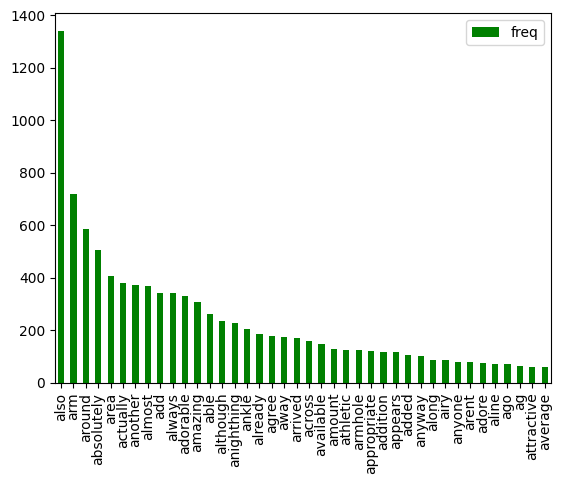

In [1527]:
word_freq.plot(kind='bar', color='Green')


##### Word frequencies for negative sentiments

In [1528]:

word_freq1 = pd.DataFrame(dtm5.apply(sum).head(40), columns=['freq'])
word_freq1.sort_values('freq', ascending=False, inplace=True)

In [1529]:
word_freq_dictionary1 = dict(dtm5.apply(sum))


In [1530]:
word_freq_dictionary1


{'able': 31,
 'absolutely': 53,
 'across': 57,
 'actually': 96,
 'add': 47,
 'added': 20,
 'addition': 16,
 'adorable': 35,
 'afraid': 30,
 'ago': 17,
 'agree': 53,
 'ala': 18,
 'almost': 99,
 'along': 29,
 'already': 54,
 'also': 398,
 'although': 54,
 'always': 56,
 'amount': 18,
 'anighthing': 47,
 'ankle': 39,
 'another': 103,
 'anyone': 24,
 'anyway': 21,
 'apart': 18,
 'appears': 36,
 'area': 95,
 'arent': 20,
 'arm': 281,
 'armhole': 38,
 'armpit': 23,
 'around': 164,
 'arrived': 66,
 'athletic': 27,
 'attached': 19,
 'available': 26,
 'average': 22,
 'away': 42,
 'awful': 34,
 'awkward': 54,
 'b': 57,
 'baby': 17,
 'back': 586,
 'bad': 120,
 'badly': 16,
 'bag': 37,
 'baggy': 47,
 'band': 27,
 'barely': 44,
 'based': 45,
 'basic': 17,
 'bc': 18,
 'beautiful': 138,
 'behind': 27,
 'belly': 16,
 'belt': 44,
 'better': 97,
 'beware': 17,
 'big': 337,
 'bigger': 37,
 'billowy': 17,
 'bit': 307,
 'black': 289,
 'blouse': 129,
 'blue': 158,
 'bodice': 24,
 'body': 154,
 'boob': 24,
 

##### For making word_clouds for postive sentiments

In [1531]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords=stop)

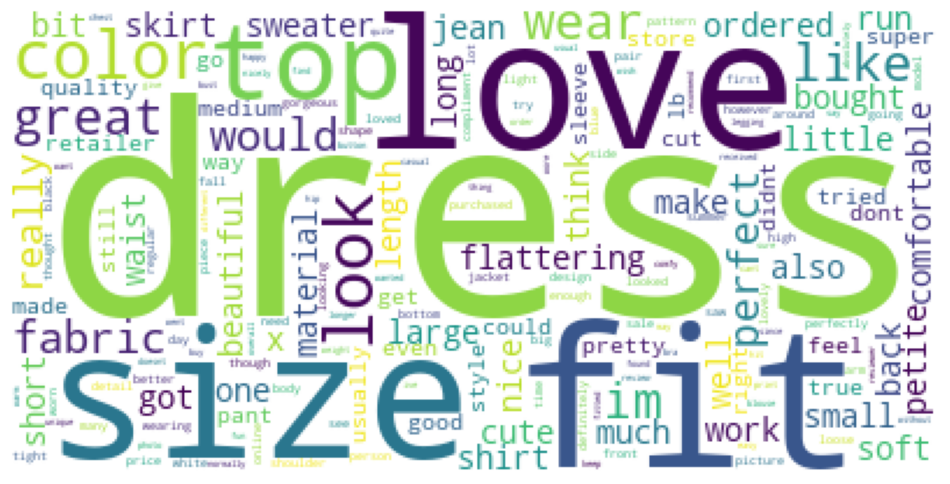

In [1532]:
wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [1533]:
plt.savefig('positive_wordcloud')


<Figure size 640x480 with 0 Axes>

##### For making word_clouds for negative sentiments

In [1534]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud1 = WordCloud(background_color='white', stopwords=stop)

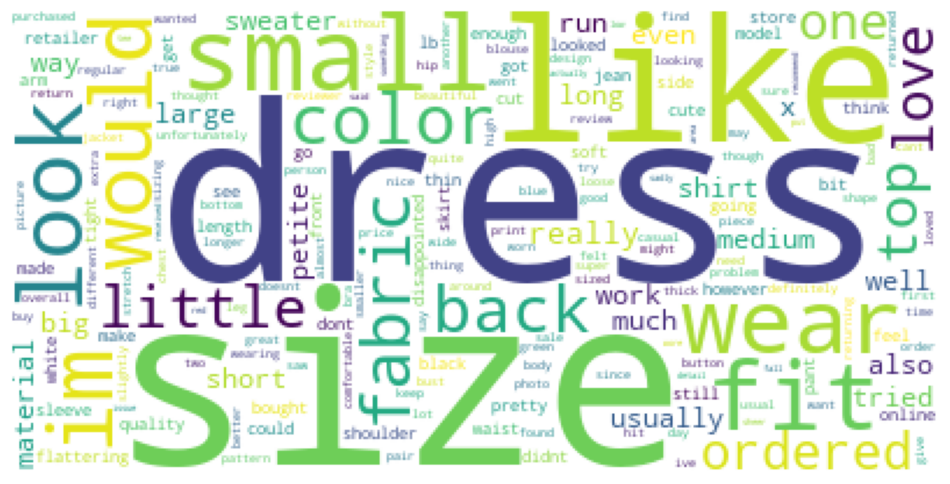

In [1535]:
wordcloud1 = wordcloud1.generate_from_frequencies(word_freq_dictionary1)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud1)
plt.show()

In [1536]:
plt.savefig('Negative_wordcloud')


<Figure size 640x480 with 0 Axes>

#### 3. Understand sentiment among the customers on the different categories, sub categories,products by location and age group

In [1537]:
data['age group'] = pd.cut(x= data['Customer Age'],bins=[20, 29, 39, 49,59 ,69,79,89 ,99])


In [1538]:
data.head()


,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,sentiment,sentiment_cat,age group
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative,"(59, 69]"
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive,"(49, 59]"
2,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive,"(39, 49]"
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,Positive,"(39, 49]"
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive,"(29, 39]"


In [1539]:
data.groupby(['Location', 'age group','Category','Subcategory1','SubCategory2',"sentiment_cat" ]).agg({'sentiment_cat': 'count'})


sentiment_cat
Location  age group Category  Subcategory1 SubCategory2   sentiment_cat               
Bangalore (20, 29]  General   Bottoms      Blouses        Negative                   0
                                                          Nuetral                    0
                                                          Positive                   0
                                           Casual bottoms Negative                   0
                                                          Nuetral                    0
...                                                                                ...
Mumbai    (89, 99]  Initmates Trend        Swim           Nuetral                    0
                                                          Positive                   0
                                           Trend          Negative                   0
                                                          Nuetral                    0
                                                          Positive                   0

[34560 rows x 1 columns]

4. Perform predictive analytics to understand the drivers of customers who are recommending the products.


In [1540]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,sentiment,sentiment_cat,age group
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative,"(59, 69]"
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive,"(49, 59]"
2,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive,"(39, 49]"
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,Positive,"(39, 49]"
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive,"(29, 39]"


In [1541]:
X4 = data['Review Text']
y4 = data['Recommend Flag']

# split the new DataFrame into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=1)
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(14746,)
(4916,)
(14746,)
(4916,)


In [1542]:
X4_train = X4_train.apply(lambda x: clean_text(x))
X4_test = X4_test.apply(lambda x: clean_text(x))

In [1543]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             lowercase = True,
                             encoding='latin-1' , 
                             max_features=100)
X_train_count4 = count_vect.fit_transform(X4_train)
feature_names_count = count_vect.get_feature_names_out()

tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=100)
X_train_tfidf4 = tfidf_vect.fit_transform(X4_train)
feature_names_tfidf = tfidf_vect.get_feature_names_out()

#Test
X_test_count4 = count_vect.transform(X4_test)
X_test_tfidf4 = tfidf_vect.transform(X4_test)

In [1544]:
dtm_count=pd.DataFrame(X_train_count4.toarray(), columns=count_vect.get_feature_names_out())
dtm_tfidf=pd.DataFrame(X_train_tfidf4.toarray(), columns=tfidf_vect.get_feature_names_out())

In [1545]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,sentiment,sentiment_cat,age group
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative,"(59, 69]"
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive,"(49, 59]"
2,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive,"(39, 49]"
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,Positive,"(39, 49]"
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive,"(29, 39]"


In [1546]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [1547]:
cat_vars = data[['Category', 'Subcategory1', 'SubCategory2', 'sentiment_cat','Location', 'Channel']]

# for c_feature in categorical_features
for c_feature in ['Category', 'Subcategory1', 'SubCategory2', 'sentiment_cat','Location', 'Channel']:
    cat_vars[c_feature] = cat_vars[c_feature].astype('category')
    cat_vars = create_dummies(cat_vars, c_feature)
 

cat_vars.head()

C:\Users\CADT-Sonai\AppData\Local\Temp\ipykernel_396\2970039511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_vars[c_feature] = cat_vars[c_feature].astype('category')


,Category_General Petite,Category_Initmates,Subcategory1_Dresses,Subcategory1_Intimate,Subcategory1_Jackets,Subcategory1_Tops,Subcategory1_Trend,SubCategory2_Casual bottoms,SubCategory2_Chemises,SubCategory2_Dresses,...,SubCategory2_Sleep,SubCategory2_Sweaters,SubCategory2_Swim,SubCategory2_Trend,sentiment_cat_Nuetral,sentiment_cat_Positive,Location_Chennai,Location_Gurgaon,Location_Mumbai,Channel_Web
0,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,True,False,True
4,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [1548]:
dtm_count

,a,all,also,am,an,and,are,as,at,back,...,was,wear,well,when,which,will,with,would,xs,you
0,1,0,0,1,0,2,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,0,2,0,0,4,0,0,2,0,...,1,0,0,1,0,1,2,0,0,0
3,4,0,0,0,0,7,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,3,5,0,0,1,0,...,2,0,0,2,0,1,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,4,0,0,0,0,2,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
14742,3,0,0,1,0,8,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
14743,3,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14744,1,0,0,0,0,3,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [1549]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,sentiment,sentiment_cat,age group
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative,"(59, 69]"
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive,"(49, 59]"
2,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive,"(39, 49]"
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,Positive,"(39, 49]"
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive,"(29, 39]"


In [1550]:
data =data.loc[:, [ 'Review Text', 'Customer Age', 'Rating', 'sentiment','Recommend Flag']]

In [1551]:
data.head()

,Review Text,Customer Age,Rating,sentiment,Recommend Flag
0,I had such high hopes for this dress and reall...,60,3,0.073675,0
1,"I love, love, love this jumpsuit. it's fun, fl...",50,5,0.550000,1
2,This shirt is very flattering to all due to th...,47,5,0.512891,1
3,"I love tracy reese dresses, but this one is no...",49,2,0.178750,0
4,I aded this in my basket at hte last mintue to...,39,5,0.133750,1


In [1552]:
data = pd.concat([ data,cat_vars], axis =1)

In [1553]:
data.columns

Index(['Review Text', 'Customer Age', 'Rating', 'sentiment', 'Recommend Flag',
       'Category_General Petite', 'Category_Initmates', 'Subcategory1_Dresses',
       'Subcategory1_Intimate', 'Subcategory1_Jackets', 'Subcategory1_Tops',
       'Subcategory1_Trend', 'SubCategory2_Casual bottoms',
       'SubCategory2_Chemises', 'SubCategory2_Dresses',
       'SubCategory2_Fine gauge', 'SubCategory2_Intimates',
       'SubCategory2_Jackets', 'SubCategory2_Jeans', 'SubCategory2_Knits',
       'SubCategory2_Layering', 'SubCategory2_Legwear', 'SubCategory2_Lounge',
       'SubCategory2_Outerwear', 'SubCategory2_Pants', 'SubCategory2_Shorts',
       'SubCategory2_Skirts', 'SubCategory2_Sleep', 'SubCategory2_Sweaters',
       'SubCategory2_Swim', 'SubCategory2_Trend', 'sentiment_cat_Nuetral',
       'sentiment_cat_Positive', 'Location_Chennai', 'Location_Gurgaon',
       'Location_Mumbai', 'Channel_Web'],
      dtype='object')

In [1554]:
data.head()

,Review Text,Customer Age,Rating,sentiment,Recommend Flag,Category_General Petite,Category_Initmates,Subcategory1_Dresses,Subcategory1_Intimate,Subcategory1_Jackets,...,SubCategory2_Sleep,SubCategory2_Sweaters,SubCategory2_Swim,SubCategory2_Trend,sentiment_cat_Nuetral,sentiment_cat_Positive,Location_Chennai,Location_Gurgaon,Location_Mumbai,Channel_Web
0,I had such high hopes for this dress and reall...,60,3,0.073675,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,"I love, love, love this jumpsuit. it's fun, fl...",50,5,0.550000,1,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
2,This shirt is very flattering to all due to th...,47,5,0.512891,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,"I love tracy reese dresses, but this one is no...",49,2,0.178750,0,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
4,I aded this in my basket at hte last mintue to...,39,5,0.133750,1,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [1555]:
#define X and y
feature_cols = [ 'Review Text', 'Customer Age', 'Rating', 'sentiment','Recommend Flag',
                'Category_General Petite', 'Category_Initmates','Subcategory1_Dresses', 'Subcategory1_Intimate',
                'Subcategory1_Jackets','Subcategory1_Tops', 'Subcategory1_Trend',
       'SubCategory2_Casual bottoms', 'SubCategory2_Chemises',
       'SubCategory2_Dresses', 'SubCategory2_Fine gauge',
       'SubCategory2_Intimates', 'SubCategory2_Jackets', 'SubCategory2_Jeans',
       'SubCategory2_Knits', 'SubCategory2_Layering', 'SubCategory2_Legwear',
       'SubCategory2_Lounge', 'SubCategory2_Outerwear', 'SubCategory2_Pants',
       'SubCategory2_Shorts', 'SubCategory2_Skirts', 'SubCategory2_Sleep',
       'SubCategory2_Sweaters', 'SubCategory2_Swim', 'SubCategory2_Trend',
       'sentiment_cat_Nuetral', 'sentiment_cat_Positive', 'Location_Chennai',
       'Location_Gurgaon', 'Location_Mumbai', 'Channel_Web']
X = data[feature_cols]
y = data['Recommend Flag']

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [1556]:
X_train['Review Text']

17303    Perhaps i have gotten too used to flowy shirts...
17352    I sized up to a medium from a small and was gl...
9632     I bought this sweater in the green and loved i...
18584    I didn't notice what some of the other reviews...
10230    I agree with some of the other reviewers; this...
                               ...                        
10955    This dress intrigued me a bit online, but not ...
17289    It just didn't work for me. i don't know if it...
5192     I've been looking for a great long, loose, ver...
12172    I bought the denim ch rocket high-rise crop la...
235      I wore this dress for the first time yesterday...
Name: Review Text, Length: 14746, dtype: object

In [1557]:
# use  TfidfVectorizer with Review_Text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train['Review Text'])
X_test_dtm = vect.transform(X_test['Review Text'])
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Review Text', axis=1).shape

(14746, 100)
(4916, 100)


(14746, 36)

In [1558]:
print(vect.get_feature_names_out())

['arms' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought'
 'chest' 'color' 'colors' 'comfortable' 'cut' 'cute' 'definitely' 'design'
 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit' 'fits'
 'flattering' 'going' 'good' 'got' 'great' 'high' 'jacket' 'jeans' 'just'
 'large' 'lbs' 'length' 'like' 'little' 'long' 'look' 'looked' 'looking'
 'looks' 'loose' 'love' 'loved' 'material' 'medium' 'model' 'nice'
 'online' 'ordered' 'pants' 'perfect' 'perfectly' 'person' 'petite'
 'pretty' 'price' 'purchased' 'quality' 'really' 'regular' 'retailer'
 'right' 'runs' 'sale' 'saw' 'shirt' 'short' 'size' 'skirt' 'sleeves'
 'small' 'soft' 'store' 'style' 'summer' 'super' 'sweater' 'think' 'tight'
 'time' 'tried' 'true' 'true size' 'try' 'usually' 've' 'waist' 'way'
 'wear' 'wearing' 'white' 'work' 'worn' 'xs']


In [1559]:
# use  TfidfVectorizer with Review_Text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train['Review Text'])
X_test_dtm = vect.transform(X_test['Review Text'])
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Review Text', axis=1).shape

(14746, 100)
(4916, 100)


(14746, 36)

In [1560]:
print(vect.get_feature_names_out())

['arms' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought'
 'chest' 'color' 'colors' 'comfortable' 'cut' 'cute' 'definitely' 'design'
 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit' 'fits'
 'flattering' 'going' 'good' 'got' 'great' 'high' 'jacket' 'jeans' 'just'
 'large' 'lbs' 'length' 'like' 'little' 'long' 'look' 'looked' 'looking'
 'looks' 'loose' 'love' 'loved' 'material' 'medium' 'model' 'nice'
 'online' 'ordered' 'pants' 'perfect' 'perfectly' 'person' 'petite'
 'pretty' 'price' 'purchased' 'quality' 'really' 'regular' 'retailer'
 'right' 'runs' 'sale' 'saw' 'shirt' 'short' 'size' 'skirt' 'sleeves'
 'small' 'soft' 'store' 'style' 'summer' 'super' 'sweater' 'think' 'tight'
 'time' 'tried' 'true' 'true size' 'try' 'usually' 've' 'waist' 'way'
 'wear' 'wearing' 'white' 'work' 'worn' 'xs']


In [1561]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('Review Text', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Review Text', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(4916, 136)

In [1562]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.8417412530512612


In [1563]:
print(dir(logreg))

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'n

In [1564]:
# Finding the score for validation

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score,accuracy_score

tr_pred=logreg.predict(X_train_dtm)
y_pred = logreg.predict(X_test_dtm)


trprecision,trrecall,trfscore,trsupport=score(y_train,tr_pred)
tracc=accuracy_score(y_train,tr_pred)
precision,recall,fscore,support=score(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [1565]:
# For Training

print('Precision : ',trprecision)
print('\nRecall : ',trrecall)
print('\nF-Score :',trfscore)
print('\nAccuracy : ',tracc)

Precision :  [0.63733144 0.86736148]

Recall :  [0.33670791 0.95769517]

F-Score : [0.44062807 0.91029273]

Accuracy :  0.845381798453818


In [1566]:
# For Testing

print('Precision : ',precision)
print('\nRecall : ',recall)
print('\nF-Score :',fscore)
print('\nAccuracy : ',acc)

Precision :  [0.63265306 0.86488929]

Recall :  [0.34140969 0.95508982]

F-Score : [0.4434907  0.90775433]

Accuracy :  0.8417412530512612


In [1567]:
# use logistic regression with all features
#logreg1 = LogisticRegression(C=1e9)
#logreg1.fit(X_train_dtm_extra, y_train)
#y_pred_class = logreg.predict(X_test_dtm_extra)
#print(metrics.accuracy_score(y_test, y_pred_class))
#Saving model
import pickle
Pkl_Filename = "Pickle_LR_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)

In [1568]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(C=1000000000.0)

In [1569]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(X_test_dtm, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test_dtm)  
Ypredict

Test score: 84.17 %


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [1570]:
print(vect.get_feature_names_out())

['arms' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought'
 'chest' 'color' 'colors' 'comfortable' 'cut' 'cute' 'definitely' 'design'
 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit' 'fits'
 'flattering' 'going' 'good' 'got' 'great' 'high' 'jacket' 'jeans' 'just'
 'large' 'lbs' 'length' 'like' 'little' 'long' 'look' 'looked' 'looking'
 'looks' 'loose' 'love' 'loved' 'material' 'medium' 'model' 'nice'
 'online' 'ordered' 'pants' 'perfect' 'perfectly' 'person' 'petite'
 'pretty' 'price' 'purchased' 'quality' 'really' 'regular' 'retailer'
 'right' 'runs' 'sale' 'saw' 'shirt' 'short' 'size' 'skirt' 'sleeves'
 'small' 'soft' 'store' 'style' 'summer' 'super' 'sweater' 'think' 'tight'
 'time' 'tried' 'true' 'true size' 'try' 'usually' 've' 'waist' 'way'
 'wear' 'wearing' 'white' 'work' 'worn' 'xs']


In [1571]:
#define X and y
feature_cols = [ 'Review Text', 'Customer Age', 'sentiment','Recommend Flag',
                'Category_General Petite', 'Category_Initmates','Subcategory1_Dresses', 'Subcategory1_Intimate',
                'Subcategory1_Jackets','Subcategory1_Tops', 'Subcategory1_Trend',
       'SubCategory2_Casual bottoms', 'SubCategory2_Chemises',
       'SubCategory2_Dresses', 'SubCategory2_Fine gauge',
       'SubCategory2_Intimates', 'SubCategory2_Jackets', 'SubCategory2_Jeans',
       'SubCategory2_Knits', 'SubCategory2_Layering', 'SubCategory2_Legwear',
       'SubCategory2_Lounge', 'SubCategory2_Outerwear', 'SubCategory2_Pants',
       'SubCategory2_Shorts', 'SubCategory2_Skirts', 'SubCategory2_Sleep',
       'SubCategory2_Sweaters', 'SubCategory2_Swim', 'SubCategory2_Trend',
       'sentiment_cat_Nuetral', 'sentiment_cat_Positive', 'Location_Chennai',
       'Location_Gurgaon', 'Location_Mumbai', 'Channel_Web']
X = data[feature_cols]
y = data['Rating']

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [1572]:
# use  TfidfVectorizer with Review_Text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train['Review Text'])
X_test_dtm = vect.transform(X_test['Review Text'])
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Review Text', axis=1).shape

(14746, 100)
(4916, 100)


(14746, 35)

In [1573]:
print(vect.get_feature_names_out())

['arms' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought'
 'chest' 'color' 'colors' 'comfortable' 'cut' 'cute' 'definitely' 'design'
 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit' 'fits'
 'flattering' 'going' 'good' 'got' 'great' 'high' 'jacket' 'jeans' 'just'
 'large' 'lbs' 'length' 'like' 'little' 'long' 'look' 'looked' 'looking'
 'looks' 'loose' 'love' 'loved' 'material' 'medium' 'model' 'nice'
 'online' 'ordered' 'pants' 'perfect' 'perfectly' 'person' 'petite'
 'pretty' 'price' 'purchased' 'quality' 'really' 'regular' 'retailer'
 'right' 'runs' 'sale' 'saw' 'shirt' 'short' 'size' 'skirt' 'sleeves'
 'small' 'soft' 'store' 'style' 'summer' 'super' 'sweater' 'think' 'tight'
 'time' 'tried' 'true' 'true size' 'try' 'usually' 've' 'waist' 'way'
 'wear' 'wearing' 'white' 'work' 'worn' 'xs']


In [1574]:
# use logistic regression with text column only
logreg2 = LogisticRegression(C=1e9)
logreg2.fit(X_train_dtm, y_train)
y_pred_class = logreg2.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.5844182262001627


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1575]:
#Using KNN model
from sklearn.neighbors import KNeighborsClassifier

model3=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
model3.fit(X_train_dtm,y_train)

KNeighborsClassifier(n_jobs=-1)

In [1576]:
# Finding the score for validation

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score,accuracy_score

tr_pred=logreg2.predict(X_train_dtm)
y_pred = logreg2.predict(X_test_dtm)


trprecision,trrecall,trfscore,trsupport=score(y_train,tr_pred)
tracc=accuracy_score(y_train,tr_pred)
precision,recall,fscore,support=score(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [1577]:
# For Training

print('Precision : ',trprecision)
print('\nRecall : ',trrecall)
print('\nF-Score :',trfscore)
print('\nAccuracy : ',tracc)

Precision :  [0.36744186 0.30405405 0.38369781 0.42837466 0.65957069]

Recall :  [0.14656772 0.09193054 0.31297297 0.19227202 0.91317696]

F-Score : [0.20954907 0.14117647 0.34474546 0.26541498 0.76592677]

Accuracy :  0.597178895971789


In [1578]:
# For Testing

print('Precision : ',precision)
print('\nRecall : ',recall)
print('\nF-Score :',fscore)
print('\nAccuracy : ',acc)

Precision :  [0.1641791  0.37373737 0.35192308 0.39873418 0.65308839]

Recall :  [0.07236842 0.09711286 0.2980456  0.17931689 0.90349908]

F-Score : [0.10045662 0.15416667 0.32275132 0.2473822  0.75815175]

Accuracy :  0.5844182262001627


In [1579]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [1580]:
#Naive Bayes (With only review_text in X-vribles)
# Naive Bayes on Count Vectors and TF-IDF


accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_dtm, y_train, X_test_dtm, y_test)
print("NB  for L1, TFIDF Vectors: ", accuracy_L1)

NB  for L1, TFIDF Vectors:  0.5541090317331163


In [1581]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_dtm, y_train, X_test_dtm, y_test)
print("LR  for L1, tfidf Vectors: ", accuracy_L1)

# Logistic Regression on Word Level TF IDF Vectors
#accuracy_L1 = train_model(LogisticRegression(), X_train_count, y_train, X_test_count, y_test)
#print("LR  for L1, WordLevel count: ", accuracy_L1)

LR  for L1, tfidf Vectors:  0.5836045565500407


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1582]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF


accuracy_L1 = train_model(svm.LinearSVC(), X_train_dtm, y_train, X_test_dtm, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)

# Linear SVC on Word Level TF IDF Vectors
#accuracy_L1 = train_model(svm.LinearSVC(), X_train_count, y_train, X_test_count, y_test)
#print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)

c:\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC  for L1, Count Vectors:  0.5762815296989422


In [1583]:
print(vect.get_feature_names_out())

['arms' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought'
 'chest' 'color' 'colors' 'comfortable' 'cut' 'cute' 'definitely' 'design'
 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit' 'fits'
 'flattering' 'going' 'good' 'got' 'great' 'high' 'jacket' 'jeans' 'just'
 'large' 'lbs' 'length' 'like' 'little' 'long' 'look' 'looked' 'looking'
 'looks' 'loose' 'love' 'loved' 'material' 'medium' 'model' 'nice'
 'online' 'ordered' 'pants' 'perfect' 'perfectly' 'person' 'petite'
 'pretty' 'price' 'purchased' 'quality' 'really' 'regular' 'retailer'
 'right' 'runs' 'sale' 'saw' 'shirt' 'short' 'size' 'skirt' 'sleeves'
 'small' 'soft' 'store' 'style' 'summer' 'super' 'sweater' 'think' 'tight'
 'time' 'tried' 'true' 'true size' 'try' 'usually' 've' 'waist' 'way'
 'wear' 'wearing' 'white' 'work' 'worn' 'xs']
